In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('./fitbit_data_folder/dailyActivity_merged.csv')

In [3]:
data.isna().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [4]:
data.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [5]:

data['ActivityDate']=pd.to_datetime(data['ActivityDate'])
data['ActiveMinutes']=data['VeryActiveMinutes']+data['FairlyActiveMinutes']
data['ActiveDistance']=data['VeryActiveDistance']+data['ModeratelyActiveDistance']


data['Weekday'] = data['ActivityDate'].dt.day_name()

data = data[['Id', 'ActivityDate', 'Weekday', 'TotalSteps', 'TotalDistance','ActiveDistance','LightActiveDistance','ActiveMinutes','LightlyActiveMinutes','SedentaryMinutes','Calories']]

data.head()

,Id,ActivityDate,Weekday,TotalSteps,TotalDistance,ActiveDistance,LightActiveDistance,ActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,Tuesday,13162,8.50,2.43,6.06,38,328,728,1985
1,1503960366,2016-04-13,Wednesday,10735,6.97,2.26,4.71,40,217,776,1797
2,1503960366,2016-04-14,Thursday,10460,6.74,2.84,3.91,41,181,1218,1776
3,1503960366,2016-04-15,Friday,9762,6.28,3.40,2.83,63,209,726,1745
4,1503960366,2016-04-16,Saturday,12669,8.16,3.12,5.04,46,221,773,1863


In [6]:
data.iloc[:, 3:].describe(percentiles=[])

,TotalSteps,TotalDistance,ActiveDistance,LightActiveDistance,ActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,7637.910638,5.489702,2.070223,3.340819,34.729787,192.812766,991.210638,2303.609574
std,5087.150742,3.924606,2.959304,2.040655,43.456579,109.174700,301.267437,718.166862
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7405.500000,5.245000,0.890000,3.365000,21.000000,199.000000,1057.500000,2134.000000
max,36019.000000,28.030001,26.110000,10.710000,275.000000,518.000000,1440.000000,4900.000000


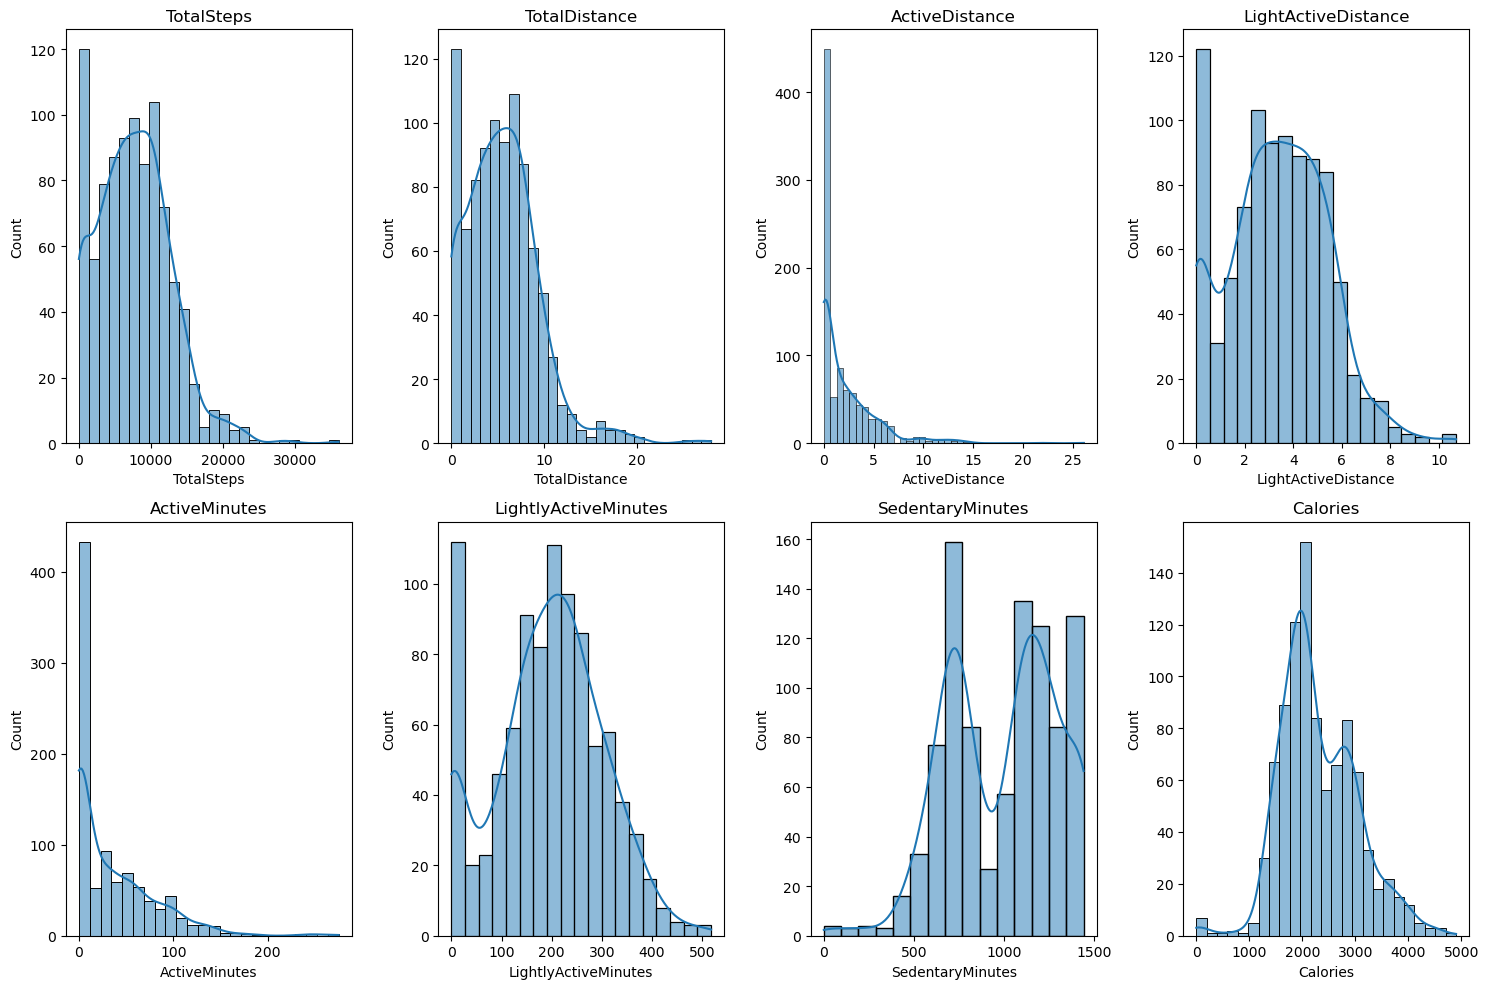

In [7]:
df = data.iloc[:, 3:]

plt.figure(figsize=(15, 10))
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(2, 4, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

In [8]:
filtered_data = data[~((data['SedentaryMinutes'] >= 960))]


In [9]:
df = filtered_data.iloc[:, 3:]
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

condition = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

filtered_data = filtered_data[~condition.any(axis=1)]

In [10]:
filtered_data.iloc[:, 3:].describe(percentiles=[])

,TotalSteps,TotalDistance,ActiveDistance,LightActiveDistance,ActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,8367.137466,5.869164,2.078221,3.783801,39.867925,214.253369,716.137466,2327.916442
std,3819.654618,2.715012,2.113022,1.534423,40.343007,75.865389,104.972274,693.696067
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,413.000000,665.000000
50%,8758.000000,6.220000,1.570000,3.780000,30.000000,210.000000,722.000000,2175.000000
max,20031.000000,13.240000,8.430000,8.270000,167.000000,412.000000,957.000000,4236.000000


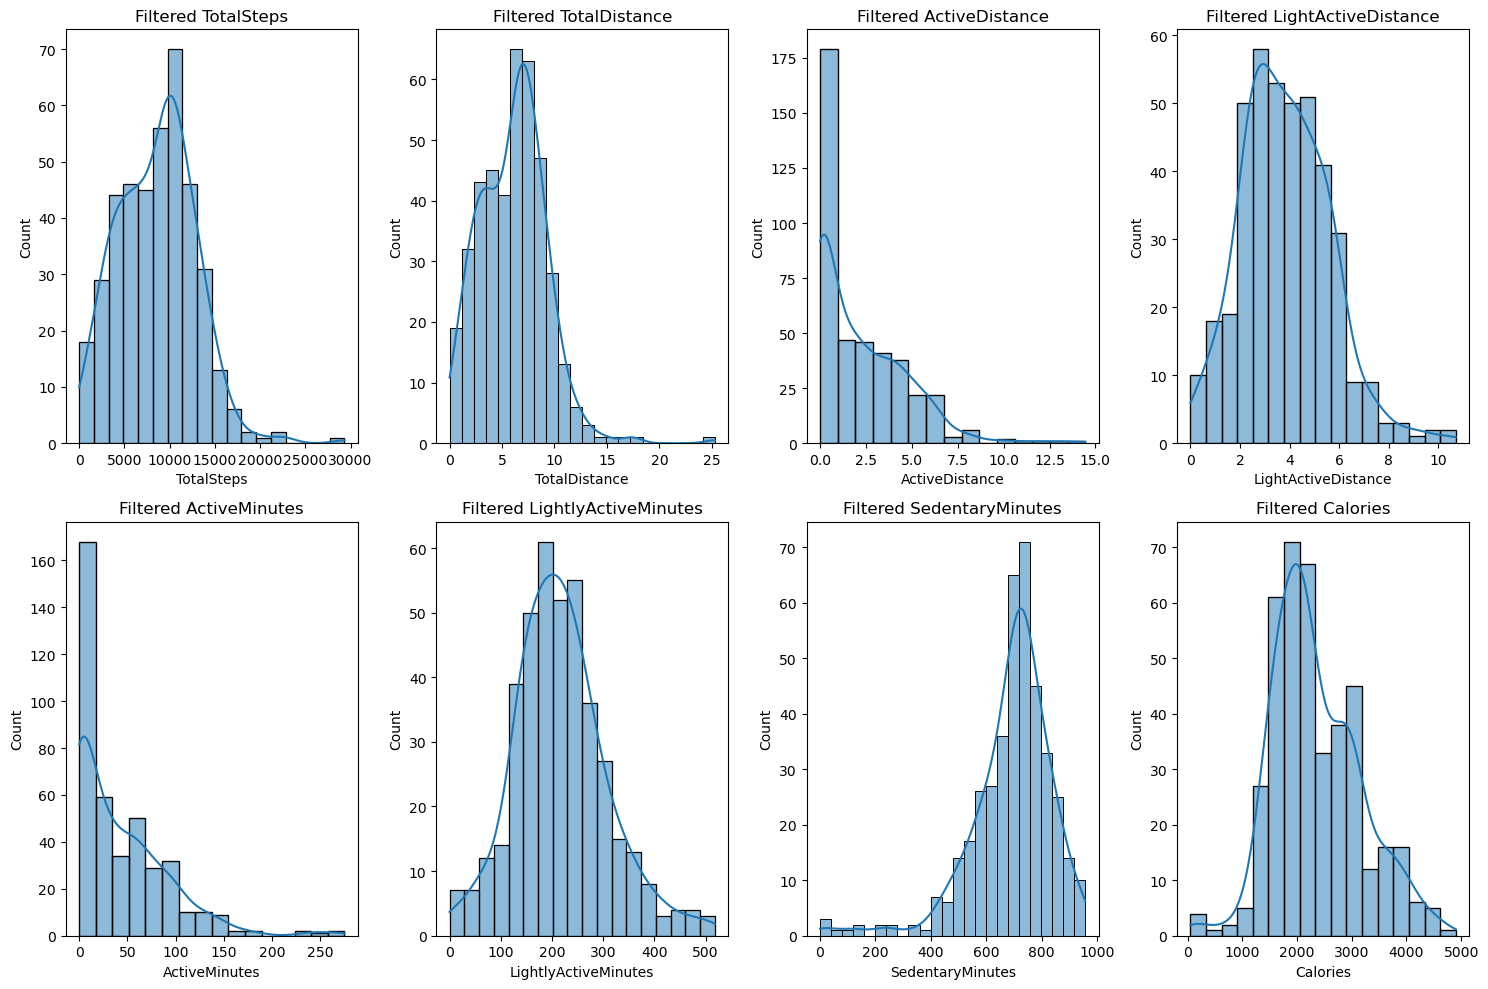

In [11]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(2, 4, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title('Filtered '+ column)
plt.tight_layout()
plt.show()

In [12]:
data = filtered_data

In [13]:
df_scaled = data.copy()

columns_to_scale = data.columns[3:]

scalers = {}
for column in columns_to_scale:
    scaler = MinMaxScaler()
    df_scaled[column] = scaler.fit_transform(data[[column]])
    scalers[column] = scaler

df_scaled = df_scaled.iloc[:,3:]

df_copy_melt = pd.melt(df_scaled, var_name='Feature', value_name='ScaledValue')
df_copy_melt

,Feature,ScaledValue
0,TotalSteps,0.657082
1,TotalSteps,0.535919
2,TotalSteps,0.487345
3,TotalSteps,0.632470
4,TotalSteps,0.484499
...,...,...
2963,Calories,0.363204
2964,Calories,0.378045
2965,Calories,0.457015
2966,Calories,0.392607


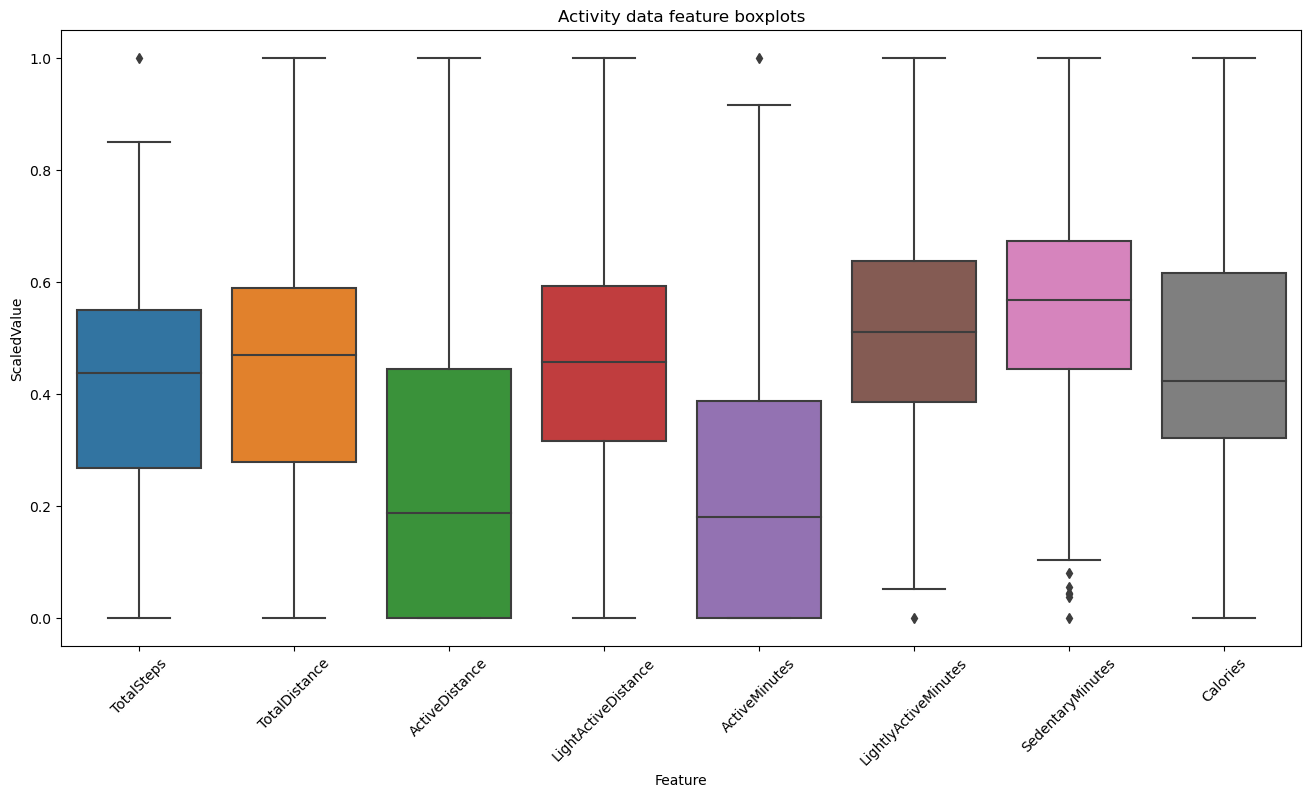

In [14]:
plt.figure(figsize=(16,8))
ax = sns.boxplot(x="Feature",
                 y="ScaledValue", 
                 data=df_copy_melt)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
ax.set(title='Activity data feature boxplots')

plt.show()

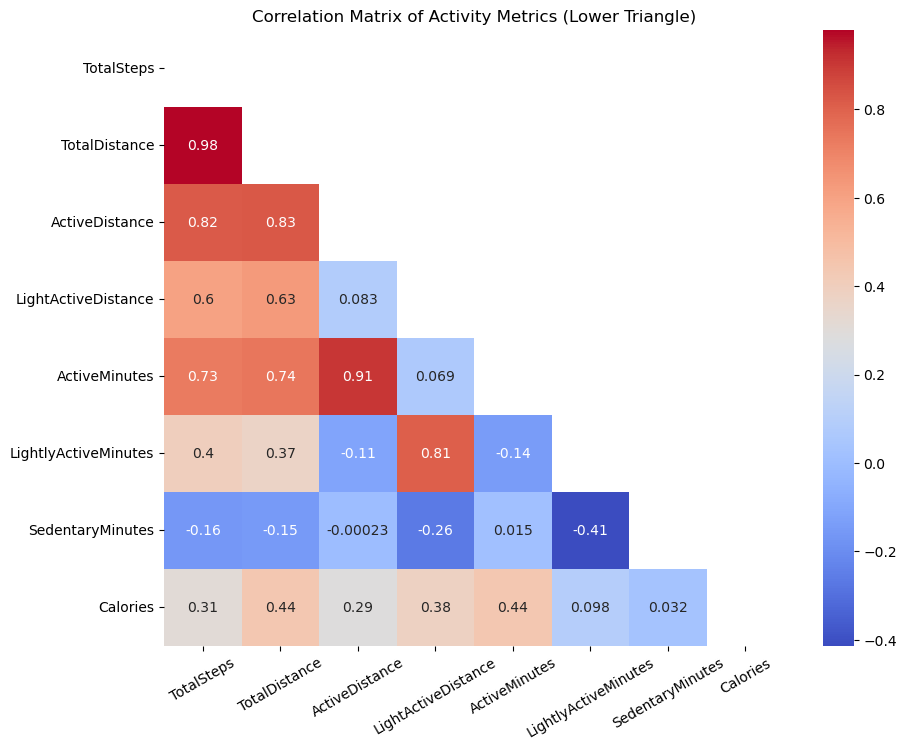

In [15]:
corr_matrix = data.iloc[:, 3:].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask)

plt.xticks(rotation=30)

plt.title("Correlation Matrix of Activity Metrics (Lower Triangle)")
plt.show()

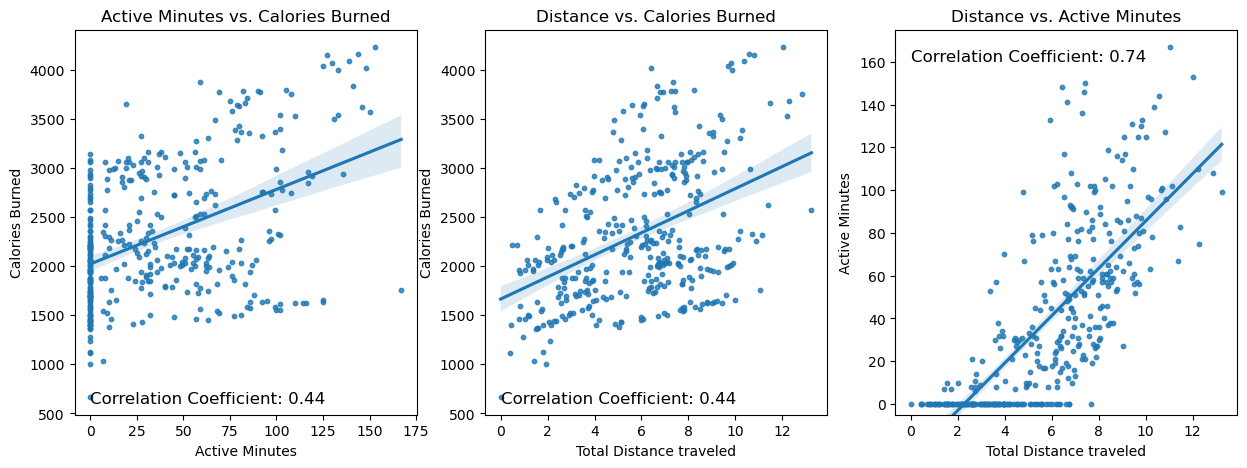

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.regplot(x='ActiveMinutes', y='Calories', data=data, scatter_kws={'s': 10}, ax=axes[0])
axes[0].set_xlabel('Active Minutes')
axes[0].set_ylabel('Calories Burned')
axes[0].set_title('Active Minutes vs. Calories Burned')

correlation_coefficient_0 = data['ActiveMinutes'].corr(data['Calories'])
axes[0].text(0, 600, f'Correlation Coefficient: {correlation_coefficient_0:.2f}', fontsize=12)

sns.regplot(x='TotalDistance', y='Calories', data=data, scatter_kws={'s': 10}, ax=axes[1])
axes[1].set_xlabel('Total Distance traveled')
axes[1].set_ylabel('Calories Burned')
axes[1].set_title('Distance vs. Calories Burned')

correlation_coefficient_1 = data['TotalDistance'].corr(data['Calories'])
axes[1].text(0, 600, f'Correlation Coefficient: {correlation_coefficient_1:.2f}', fontsize=12)

sns.regplot(x='TotalDistance', y='ActiveMinutes', data=data, scatter_kws={'s': 10}, ax=axes[2])
axes[2].set_xlabel('Total Distance traveled')
axes[2].set_ylabel('Active Minutes')
axes[2].set_title('Distance vs. Active Minutes')
axes[2].set_ylim(-5, 175)

correlation_coefficient_2 = data['TotalDistance'].corr(data['ActiveMinutes'])
axes[2].text(0,160, f'Correlation Coefficient: {correlation_coefficient_2:.2f}', fontsize=12)

plt.show()

In [17]:

order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data['Weekday'] = pd.Categorical(data['Weekday'], categories=order, ordered=True)


weekday_means = data.drop(columns=['Id','ActivityDate']).groupby('Weekday').mean()
weekday_means

,TotalSteps,TotalDistance,ActiveDistance,LightActiveDistance,ActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
Weekday,,,,,,,,
Monday,9253.204545,6.483864,2.518864,3.955909,50.704545,222.704545,720.113636,2420.704545
Tuesday,9386.508197,6.569344,2.660984,3.899508,53.114754,214.852459,730.426230,2518.770492
Wednesday,8030.193548,5.693226,1.975161,3.711935,37.483871,209.338710,717.080645,2361.370968
Thursday,8030.854839,5.675323,1.961935,3.705323,37.645161,199.709677,756.967742,2239.612903
Friday,8150.509804,5.671176,1.769412,3.889608,35.941176,225.803922,738.862745,2325.686275
Saturday,8784.090909,6.095682,2.159318,3.934545,38.318182,231.272727,667.568182,2286.931818
Sunday,6947.425532,4.875532,1.457872,3.414894,24.319149,202.765957,659.574468,2106.489362


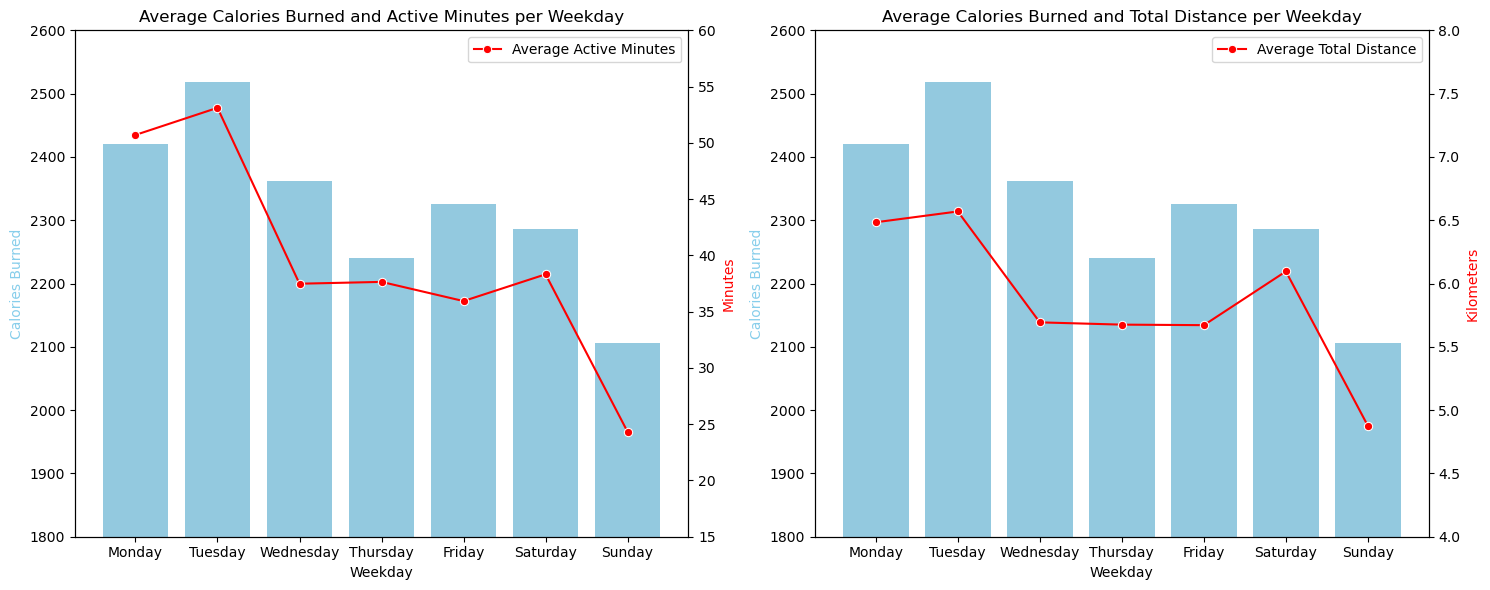

In [18]:
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x=weekday_means.index, y=weekday_means['Calories'], color='skyblue', ax=ax1, label='Average Calories Burned')
ax1.set_title('Average Calories Burned and Total Distance per Weekday')
ax1.set_ylabel('Calories Burned')
ax1.yaxis.label.set_color('skyblue')

ax1_2 = ax1.twinx()
sns.lineplot(data=weekday_means, x=weekday_means.index, y='TotalDistance', color='red', marker='o', ax=ax1_2, label='Average Total Distance')
ax1_2.set_ylabel('Kilometers')
ax1_2.set_ylim(4, 8)
ax1_2.yaxis.label.set_color('red')

sns.barplot(x=weekday_means.index, y=weekday_means['Calories'], color='skyblue', ax=ax2, label='Average Calories Burned')
ax2.set_title('Average Calories Burned and Active Minutes per Weekday')
ax2.set_ylabel('Calories Burned')
ax2.yaxis.label.set_color('skyblue')

ax2_2 = ax2.twinx()
sns.lineplot(data=weekday_means, x=weekday_means.index, y='ActiveMinutes', color='red', marker='o', ax=ax2_2, label='Average Active Minutes')
ax2_2.set_ylabel('Minutes')
ax2_2.set_ylim(15, 60)
ax2_2.yaxis.label.set_color('red')

ax1.set_ylim(1800, 2600)
ax2.set_ylim(1800, 2600)

plt.tight_layout()
plt.show()

In [19]:
data['Weekday'].value_counts()

Weekday
Wednesday    62
Thursday     62
Tuesday      61
Friday       51
Sunday       47
Monday       44
Saturday     44
Name: count, dtype: int64

In [20]:
activity = pd.read_csv('./fitbit_data_folder/hourlyIntensities_merged.csv')
calories = pd.read_csv('./fitbit_data_folder/hourlyCalories_merged.csv')
#steps = pd.read_csv('./fitbit_data_folder/hourlySteps_merged.csv')

In [21]:
activity.isna().sum()

Id                  0
ActivityHour        0
TotalIntensity      0
AverageIntensity    0
dtype: int64

In [22]:
calories.isna().sum()

Id              0
ActivityHour    0
Calories        0
dtype: int64

In [23]:
activity.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,7,0.116667
3,1503960366,4/12/2016 3:00:00 AM,0,0.000000
4,1503960366,4/12/2016 4:00:00 AM,0,0.000000


In [24]:
calories.head()

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


In [25]:
activity['ActivityHour']=pd.to_datetime(activity['ActivityHour'])
calories['ActivityHour']=pd.to_datetime(calories['ActivityHour'])

/tmp/ipykernel_757/2839981579.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  activity['ActivityHour']=pd.to_datetime(activity['ActivityHour'])
/tmp/ipykernel_757/2839981579.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  calories['ActivityHour']=pd.to_datetime(calories['ActivityHour'])


In [26]:
hours = pd.merge(activity, calories, on=['Id','ActivityHour'])
hours['Hour'] = hours['ActivityHour'].dt.hour
hours['Weekday'] = hours['ActivityHour'].dt.day_name()
hours.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity,Calories,Hour,Weekday
0,1503960366,2016-04-12 00:00:00,20,0.333333,81,0,Tuesday
1,1503960366,2016-04-12 01:00:00,8,0.133333,61,1,Tuesday
2,1503960366,2016-04-12 02:00:00,7,0.116667,59,2,Tuesday
3,1503960366,2016-04-12 03:00:00,0,0.000000,47,3,Tuesday
4,1503960366,2016-04-12 04:00:00,0,0.000000,48,4,Tuesday


In [27]:
a = hours.groupby('Weekday')[['TotalIntensity']].mean()
b = data.groupby('Weekday')[['ActiveMinutes']].mean()
a.merge(b, on='Weekday').corr()

,TotalIntensity,ActiveMinutes
TotalIntensity,1.000000,0.634472
ActiveMinutes,0.634472,1.000000


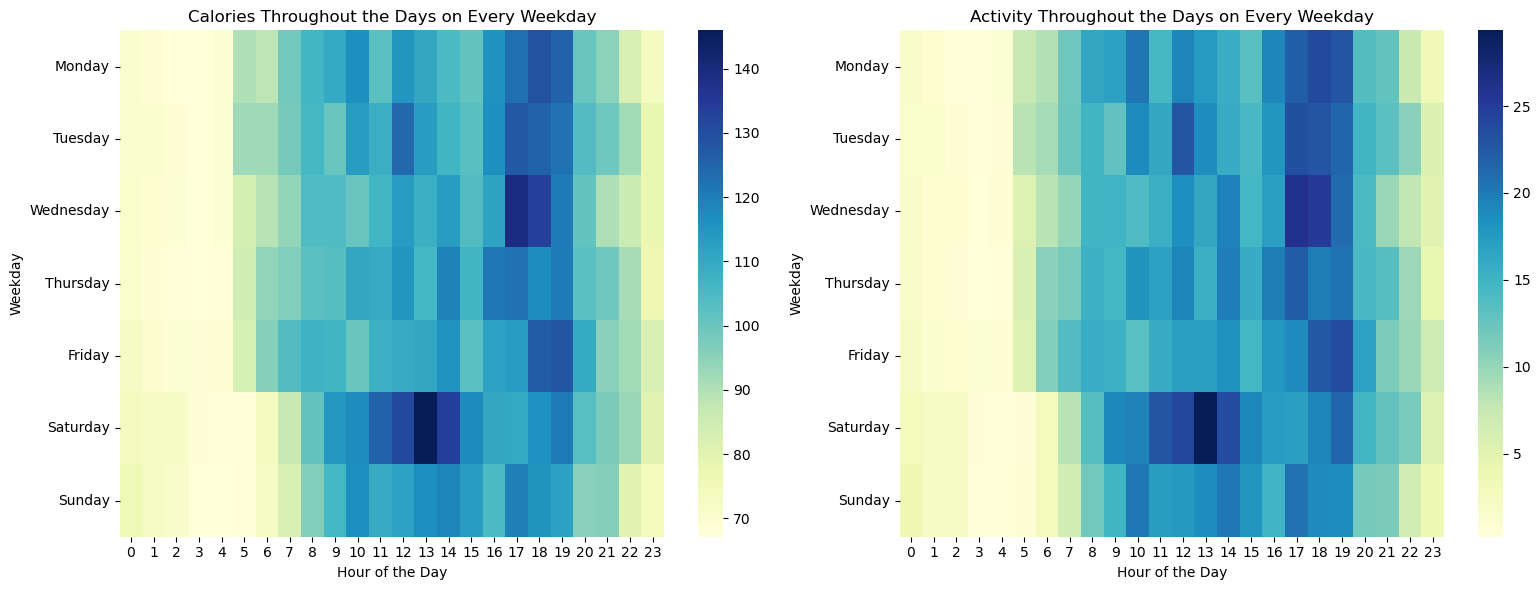

In [28]:


agg_data = hours.groupby(['Weekday', 'Hour'])[['Calories', 'TotalIntensity']].mean().reset_index()
agg_data['Weekday'] = pd.Categorical(agg_data['Weekday'], categories=order, ordered=True)
pivot_data = agg_data.pivot(index='Weekday', columns='Hour')

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(pivot_data['Calories'], cmap='YlGnBu', annot=False, cbar=True, ax=axes[0])
axes[0].set_title('Calories Throughout the Days on Every Weekday')
axes[0].set_xlabel('Hour of the Day')
axes[0].set_ylabel('Weekday')
axes[0].set_yticklabels(order, rotation=0)

sns.heatmap(pivot_data['TotalIntensity'], cmap='YlGnBu', annot=False, cbar=True, ax=axes[1])
axes[1].set_title('Activity Throughout the Days on Every Weekday')
axes[1].set_xlabel('Hour of the Day')
axes[1].set_ylabel('Weekday')
axes[1].set_yticklabels(order, rotation=0)

plt.tight_layout()

plt.show()

In [29]:
weight = pd.read_csv('./fitbit_data_folder/weightLogInfo_merged.csv')
weight.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [30]:
weight.dropna()
weight = weight[['Id','WeightKg','BMI']]
weight.head()

,Id,WeightKg,BMI
0,1503960366,52.599998,22.650000
1,1503960366,52.599998,22.650000
2,1927972279,133.500000,47.540001
3,2873212765,56.700001,21.450001
4,2873212765,57.299999,21.690001


In [31]:
weight = weight.groupby('Id').mean()
weight

,WeightKg,BMI
Id,,
1503960366,52.599998,22.650000
1927972279,133.500000,47.540001
2873212765,57.000000,21.570001
4319703577,72.350002,27.415000
4558609924,69.639999,27.214000
5577150313,90.699997,28.000000
6962181067,61.553334,24.028000
8877689391,85.145834,25.487083


In [32]:
weight.describe(percentiles=[])

,WeightKg,BMI
count,8.000000,8.000000
mean,77.811146,27.988011
std,26.051549,8.236066
min,52.599998,21.570001
50%,70.995001,26.350542
max,133.500000,47.540001
